# CS-EJ3211 Machine Learning with Python 

## Student Project: Tissue type classification based on microarray gene expression profiles
**submission deadline 22.03.2021 23:59 Helsinki time**

### Student project instructions

In order to participate in the project, you must submit a project report by 22.03.2021. The report is submitted as a Python notebook (.ipynb format), and should follow the required outline presented in this notebook.

The submitted report should contain all Python code used in the project (early prototyping and "scrapbooking" can be excluded). The notebook should be arranged so that the reader can replicate your workflow by running the cells in the notebook in order.

**General recommendations**\
Strive to use the notation used on this course if you use mathematical formulas or symbols. In the case that you want to use different notation, use good scientific writing principles and clearly define the meaning of your symbols.

**Please comment your code.**\
The commenting doesn't have to be as comprehensive as it is in the exercise rounds (where it is for educational reasons), but it should give some indication of the what is happening in different sections of your code.

## Introduction

"A microarray is a laboratory tool used to detect the expression of thousands of genes at the same time. DNA microarrays are microscope slides that are printed with thousands of tiny spots in defined positions, with each spot containing a known DNA sequence or gene."\
text source: https://www.nature.com/scitable/definition/microarray-202/

<img src="DNA_microarray.jpg" width=800/>

image source: https://www.genome.gov/about-genomics/fact-sheets/DNA-Microarray-Technology

The microarray data for this problem consists of normalized relative expression of certain genes measured in different tissue. There are 3000 gene probes and 2000 samples. The full dataset can be found at https://www.ebi.ac.uk/arrayexpress/ (accession number E-MTAB-62). 

The first columns of  'data_subset.csv' file (file located in 'coursedata' folder) contains ID's of samples (e.g. 'GSM23227.CEL') and analyses info ('RMA') and the rest - expression values for 3000 genes. 

Your task is to predict the type of tissue ('disease' vs 'normal') based on expression profile of samples. 

In addition to this task, you can solve ML problem of predicting multiple types of tissue  {'cell line', 'disease', 'neoplasm', 'normal'}. This is an optional task, which allows to earn extra points. 

<a id='problem'></a>
<div class=" alert alert-info">

## Problem formulation (5 p)

In contrast to the conceptual presentation of the problem in the introduction, this section formulates the problem as a machine learning problem. You should:

- Define the type of your problem. Is it a regression or classification problem? Or perhaps something else?

- Define the **data points** in your problem and define the **features** and **labels** of the points.

- Define the **metric** that serves as the measure of quality of an ML model on your problem. For example, the mean-squared-error might be a reasonable choice for a regression problem, whereas some kind of balanced accuracy score might suit a classification problem with imbalanced classes. Note that this is not necessarily equivalent to the loss function used by your model!
    
</div>

### YOUR TEXT HERE ###
answer questions above

- For the first question:
At first, this is a classification problem, since we need to use dataset to classify their features. For regression,it will reflect continuous numerical values but not several clusters.

- For the next question:
Data points mean the overall data(2000 lines) in the data_subset.csv;
features are expression values for 2999 genes;
labels are the last column that is column label

- For the next question:
Training accuracy and validation accuracy can be used as metric when doing a classification task


In [127]:
import pandas as pd

original_dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv")
print(original_dataset.loc[0:,:])

         Source Name    0          1         2         3          4         5  \
0       GSM23227.CEL  RMA   8.113306  8.436494  6.373835   7.985305  4.334113   
1     1229968152.CEL  RMA  10.633046  7.286210  6.955318   9.168461  4.314263   
2      GSM133626.CEL  RMA   8.527562  8.262509  6.725264  10.009785  4.439494   
3       GSM47465.CEL  RMA   8.899864  7.210738  6.677196   9.336546  4.437717   
4      GSM124909.CEL  RMA   8.703130  7.426840  6.441970   8.597625  4.348691   
...              ...  ...        ...       ...       ...        ...       ...   
1995    GSM21215.CEL  RMA   9.375530  5.813558  6.654986   9.104328  5.100172   
1996    GSM29703.CEL  RMA   9.174483  6.770083  6.570502   8.571956  4.370335   
1997    GSM29752.CEL  RMA   8.876003  6.987061  6.890687   8.464895  4.223508   
1998    GSM29750.CEL  RMA   9.361270  7.050273  6.825901   8.558946  4.187855   
1999  1347769995.CEL  RMA  10.801932  6.242204  6.611269   9.325318  4.796832   

             6         7   

In [128]:
dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv",header=None).to_numpy()

data_points = dataset[0:2001,] # shape 2000x3003 . the function of this line is to remove line title
features = data_points[:,2:3002] # 2000x3000 remove source and name
labels = data_points[:,3002] # 2000x1

<a id='methods'></a>
<div class=" alert alert-info">

# Methods

## **General instructions:**
    
This section presents the methods used to solve the machine learning problem and walks through the process of solving the problem. This section could include:

- A description of the dataset. What is the source of the dataset? How many data points does it contain? The features and labels where already presented in the previous section but can be presented once again.
    
- Describe why and how the data split on subsets.

- A description of the pre-processing methods that you have used on your data. 

- A description of the model(s) you are using to solve your machine learning problem. Of what form are the predictor functions (include formula if applicable)? What is the loss function to be minimized or maximized (include formula if applicable). You should also include a short description of the hyperparameters that you tune to optimize the model. 
    
- If you use some tools/methods for model selection and validation (e.g. cross-validation, grid search), explain the purpose of it and how it was performed.
    
- A description of hyperparameter tuning and model selection process. E.g. which validation methods have you used to estimate the model performance on previously unseen data?


### YOUR TEXT HERE ###
answer questions above:
- According to the general instructions, I answered questions successively with a sequence:
For dataset, the source is from https://www.ebi.ac.uk/arrayexpress/ (accession number E-MTAB-62). It contains 2000 data. The features and labels can be described as follows.

- It is because there is need to divide data into two parts which are training data and validation data. Validation data is used to test the trained model. Basically, we can use package of train_test_split such as, 
x_train, x_test, y_train, y_test = train_test_split(...)

- when we have got data, there are several steps we should know:
PCA dimensionality reduction can be used as one of the pre-processing methods to process data.

- when it comes to select model to solve this problem, I think KNN(K-nearest neighbors, SVM(support vector machine), or decision tree could be used to train data, but I prefer to use SVM model. when it comes to the predictor function, there are several methods that can be used. Sigmoid function, Relu or tanh predictor function can be regarded as one of the popular linear classifiers. Sigmoid function seems a practical predictor function, and when h(x) is more than 0.5, the assigned class is 1. Instead, when h(x) is less than 0.5, the assigned class is 0.
\begin{equation}
h(\mathbf{x})=w_0 + \mathbf{w}^{T} \mathbf{x}
\end{equation}
The loss function is shown as follows, such as MSE
\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - h(\mathbf{x}^{(i)}))^2.
\end{equation}
As for tuning hyperparameters, the aim is to get a smaller prediction error in the testing dataset, namely best learning characteristics and effects. The hyperparameter should be set before training, and it is not the result after the training. There are various hyperparameters in the different models, for example learning rate which is possibly the most important one, k in K-Nearest Neighbors, c in support vector machines, the number of hidden layers in Neural Networks. Basically, learning rate could be seen as a item of trade-off between the prediction error incurred on the training error and the complexity of a predictor. A large one focus on the complexity of predictor function, and instead, a smaller one is pay attention to returning a smaller average loss.

- The purpose of model selection and validation is to avoid overfitting, and select the best hyperparameter. Another function is to estimate the performance of the model and select a better one where there are several models provided to choose. K-fold method could be used to divide the dataset into training data and testing data. Searching method such as Grid search or Randomized search builds a model for every combination of hyperparameters specified and evaluates each model. Using GridSearchCV() to tune hyperparameters before .fit() and after model selection such as Lasso().

- When creating a machine learning model, it should go to present with design choices as to how to define model architecture. Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. In true machine learning fashion, we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning. Once the parameters of model has been decided, the structure of model also is decided. Visual inspection is one of methods to do the validation process after the training model is used to train new data.

In [130]:
features = data_points[:,2:3002] # 2000x3000
labels = data_points[:,3002] # 2000x1, pick the first index 0, but not pick the last index 3003 though the size of label is 2000x3003

# **Specific instructions:**

# PART 1 (mandatory, 15 p) 

    
Your task is to build logistic regression and Support Vector Machine (SVM) models for solving tissue type prediction task. During this course, you have familiarized yourself with multiple ML methods from scikit-learn library, but now you will need to independently learn the specifics of how to use the SVM classifier in scikit-learn by studying the documentation and related resources. 
    
More precisely, you need to:

1. Upload the "data_subset.csv" file as a Pandas dataframe. The file contains gene expression data for tissues of different types. The first column contains the sample id and the second column indicates how the data was analysed (Robust Multi-array Average or RMA). The remaining columns, excluding the final one, contain the relative gene expression values. Finally, the last column contains the category (label) to which the data points belong to ('cell line', 'disease', 'neoplasm', 'normal'). 


2. In this part, you will only use data points belonging to two of the four categories in the dataset - 'disease' and 'normal'. Consequently, you should create a new data frame that only contains the data points with these labels. The new dataset should consist of 700 data points.


3. Create numpy arrays `X` (feature matrix) and `y` (label vector) based on the data frame. The feature matrix should contain the expression data and be of shape `(700, 3000)`.
   The label vector `y` should be of shape=(700,) and contain integer values 1 (for data points labled as "disease") and 0 (for data points labled as 'normal').
   
4. Split the data with `train_test_split` into training and test sets (with 80:20 ratio, random_state=42). Keep test set aside until final evaluation. Use training data to choose the model. 

5. Implement PCA (using 20 components) with logistic regression:

   - Use Pipeline sklearn class to chain pre-processing steps (StandardScaler() and PCA(n_components=20, random_state=42)) and logistic regression. 
   - Use `cross_val_score class` from sklearn.model_selection to perform 5-fold cross-validation and get average F1-score (use parameters scoring='f1' and cv=5 in `cross_val_score object`).
 

6. Implement PCA (using 20 components) with SVM:

  - Construct Pipeline object with scaler and PCA for SVM model in a similar way as for logistic regression.
  - Use training set for choosing parameters and hyperparameters. Specifically, perform grid search combined with cross-validation on the Pipeline object by using the `GridSearchCV` class in scikit-learn. 
  
  The candidate parameter values for the SVM model in your grid search should be `'C': [0.01, 1, 100]` and `'gamma': [1e-04, 1e-03, 1e-02]}`, the number of folds used for cross-validation should be `cv=5`, and scoring parameter `f1`.
  - Report F1-score of SVM model with best parameter values for `C` and `gamma`.
  

7. Choose model with best F1-score and perform final evaluation:

    - Fit model (pipeline object) on the training dataset.
    - Report the accuracy and F1-score on the training and test sets.
    - Plot a normalized confusion matrix for the test set. 

Useful links:

- Learn about Support Vector Machine (SVM) methods (e.g. https://scikit-learn.org/stable/modules/svm.html#support-vector-machines) and the implementation of SVM (specifically the SVC) in the scikit-learn library.
- Pipeline example https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
- Metrics for evaluation https://scikit-learn.org/stable/modules/model_evaluation.html
- Function for plotting confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

In [131]:
### QUESTION 1 ###
### YOUR CODE HERE ###
### PART 1 AND 2 ###
import numpy as np
import pandas as pd

# original_dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv") # DataFrame
original_dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv")
df2 = original_dataset

# picking up dataframe data should use dataframe.loc[][]
for i in range(df2.shape[0]):
    if(df2.loc[i][3002] == "cell line" or df2.loc[i][3002] == "neoplasm"):
        df2.drop(i,axis = 0,inplace = True)

print("finished getting data with two labels")

finished getting data with two labels


In [132]:
### QUESTION 3 ###
df2_store = df2
df2['label'] = df2['label'].map({'disease': 1, 'normal': 0})
df2.drop("Source Name",axis = 1,inplace = True)
df2.drop("0",axis = 1,inplace = True)

# df3 = df3.values # pd.DataFrame, np->pd; df.values, pd->np
# X = df3[:,0:3000] # 700x3000
# y_temp = df3[:,3000] # 700x1
# y = np.zeros(shape=(700,1),dtype=int)
# for i in range(df3.shape[0]):
#     if(y_temp[i] == "disease"):
#         y[i] = 1
#     elif(y_temp[i] == "normal"):
#         y[i] = 0

In [133]:
df2.head()

,1,2,3,4,5,6,7,8,9,10,...,2992,2993,2994,2995,2996,2997,2998,2999,3000,label
500,8.841740,6.128903,6.777261,9.022795,4.408391,7.888266,6.314197,5.371741,6.574600,4.403353,...,5.571061,8.349877,7.215102,6.139312,7.480027,8.060038,7.898205,5.848507,8.264427,1
501,8.670826,6.127531,7.180859,9.113487,4.462474,7.575946,6.024093,5.688475,6.678819,4.264804,...,5.776290,8.237783,7.575009,6.181293,7.538640,9.073399,8.696998,6.328636,8.275500,1
502,8.809229,6.270196,6.778510,9.250695,4.396258,7.527639,6.149267,5.587484,6.401677,4.394353,...,5.937792,8.428287,7.289294,6.100881,7.403753,8.763766,8.825195,6.572378,8.584387,1
503,9.089377,6.648818,7.085590,8.998140,4.462842,7.869689,6.060440,5.779001,6.451494,4.155387,...,6.141272,8.329656,7.586376,6.212241,7.500111,8.180384,8.109306,6.239723,8.848850,1
504,9.239313,6.485085,7.185377,9.530301,4.617422,7.947637,6.232575,5.675885,6.871626,4.390932,...,5.131223,7.934448,7.583246,6.098047,7.537817,8.806213,8.635038,6.964470,8.547701,1


In [134]:
X = df2.drop('label',axis=1)
X.head()
y = df2['label']
y.head()

500    1
501    1
502    1
503    1
504    1
Name: label, dtype: int64

In [135]:
### QUESTION 4 ###
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state = 42)
y_train = y_train.ravel()
y_val = y_val.ravel()
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(560, 3000) (140, 3000) (560,) (140,)


In [136]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# lr = LogisticRegression()
# lr.fit(X_train,y_train)

# y_pred = lr.predict(X_val)
# print(accuracy_score(y_val,y_pred))

# y_pred_train = lr.predict(X_train)
# print(accuracy_score(y_train,y_pred_train))

In [137]:
### QUESTION 5 ###
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
n = 20
np.random.seed(1)
pca = PCA(n_components = n,random_state = 42)
log_reg = LogisticRegression()

pipe = Pipeline([('scaler',scaler), ('pca',pca), ('log_reg',log_reg)]) # create estimator with LogisticRegression
# pipe.fit(X_train,y_train)
# pred_y = pipe.predict(X_val)
# accuracy = 1 - mean_squared_error(y_val,pred_y)
accuracy = np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1'))

In [138]:
accuracy

0.6250343936801497

In [139]:
### QUESTION 6 ###
### PART 1 AND PART 2 ###
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

scaler_svm = StandardScaler()
n = 20
np.random.seed(1)
pca_svm = PCA(n_components=n)
svc_svm = SVC()

C = [0.01, 1, 100]
gamma = [1e-04, 1e-03, 1e-02]
param = {
    'svc__C' : C,
    'svc__gamma' : gamma
}

pipe_svm = Pipeline([('scaler',scaler_svm),('pca',pca_svm),('svc',svc_svm)]) # create estimator with SVM
grid_search_cv = GridSearchCV(pipe_svm, param, cv=5, scoring='f1').fit(X_train,y_train)
### PART 3 ###
# print(grid_search_cv.best_params_) # C=100,gamma=1e-4
C_best = [100]
gamma_best = [1e-4]
param_best = {
    'svc__C':C_best,
    'svc__gamma':gamma_best
}
grid_search_cv_best = GridSearchCV(pipe_svm, param_best, cv=5, scoring='f1').fit(X_train,y_train)
pred_y_best = grid_search_cv_best.predict(X_train)
f1_score_res = f1_score(y_train, pred_y_best, average=None)
print("F1-score for best C and gamma are {}".format(f1_score_res))

F1-score for best C and gamma are [0.87341772 0.83606557]


normal : 0, disease : 1
average training accuracy:0.8554,average testing accuracy:0.8071
training F1-score:[0.87163233 0.83435583],testing F1-score:[0.82802548 0.7804878 ] for disease and normal tumor respectively in each dataset
Confusion matrix, without normalization
[[65 15]
 [12 48]]


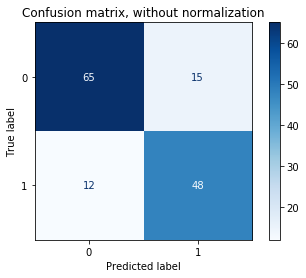

In [140]:
### QUESTION 7 ###
### PART 1 AND 2 ###
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

scaler_svm = StandardScaler()
n = 20
np.random.seed(1)
pca_svm = PCA(n_components=n)
svc_svm = SVC()

C_best = [100]
gamma_best = [1e-04]
param_best = {
    'svc__C' : C_best,
    'svc__gamma' : gamma_best
}

pipe_svm = Pipeline([('scaler',scaler_svm),('pca',pca_svm),('svc',svc_svm)]) # create estimator with SVM
grid_search_cv = GridSearchCV(pipe_svm, param, cv=5, scoring='f1').fit(X_train,y_train)
pred_y_best_train = grid_search_cv.predict(X_train)
tra_acc = accuracy_score(y_train, pred_y_best_train)
f1_score_res_train = f1_score(y_train, pred_y_best_train, average=None)

pred_y_best_val = grid_search_cv.predict(X_val)
val_acc = accuracy_score(y_val, pred_y_best_val)
f1_score_res_val = f1_score(y_val, pred_y_best_val, average=None)
print("normal : 0, disease : 1")
print("average training accuracy:{:0.4f},average testing accuracy:{:0.4f}".format(tra_acc, val_acc))
print("training F1-score:{},testing F1-score:{} for disease and normal tumor respectively in each dataset".format(f1_score_res_train, f1_score_res_val))

### PART 3 ###
disp = plot_confusion_matrix(grid_search_cv,X_val,y_val,cmap=plt.cm.Blues,normalize=None)
title = 'Confusion matrix, without normalization'
disp.ax_.set_title('Confusion matrix, without normalization')
print(title)
print(disp.confusion_matrix)
plt.show()

### YOUR TEXT HERE ###

#### Part 1 ####
- For this part, the pd.read_csv("path directory") method is used to read the file. Actually, the data is already a form of DataFrame, so there is no need to call pd.DataFrame, otherwise, it is necessary to call this instance. 
- Here, using .copy() to store a same file to be a backup. And then use .loc to slice the dataframe, and got only one line as a file. 
- Using .drop() method to drop the title column of "Source Name" and "0", and next Using .drop() again to drop the first line. That is to say to create a empty DataFrame with correct title to store the new data later.

#### Part 2 ####
- Pick up those data with label "disease" and "normal", and write into previous empty DataFrame line by line.

#### Part 3 ####
- Using .map() to deal with replacing tasks in which disease and normal should be marked as 1 and 0 respectively.
- Picking up the "label" column to be label column and Picking up the residual 3000 columns to be features columns.

#### Part 4 ####
- Using class train_test_split to split the whole dataset eithor X or y into two parts, in which 80% of X and y is training set and 20% of X and y is testing data. -  - Besides, Using revel() to transform a array for example (500,1) into (500,) to match the next operation.

#### Part 5 ####
- Using StandardScaler() to normalize data, using PCA() to decomposite data and using LogisticRegression to be an estimator.
- using Pipeline() to coorperate them.
- using np.mean() and cross_val_score() with parameters "estimator, dataset, cv=5, scoring='f1'" to get the accuracy on the training set.

#### Part 6 ####
- using class GridSearchCV to be a estimator to fit the dataset.
- what inside is estimator Pipeline which is same with previous one, parameters with  class StandardScaler(), decomposition class PCA(n_components=n), estimator SVC() with several values in "C" and "gamma".
- using .best_params_ in GridSearchCV to find the best parameters of C and gamma in a series of values. The best values of C and gamma are 100 and 1e-4
- using f1_score() to get the score of F1-score

####  Part 7 ####
- using accuracy_score() to get the similarity or accuracy between prediction value and true value.
- Finally, the F1-score of SVM model with best parameter values for C(100) and gamma(1e-4) is [0.87341772 0.83606557] which mean the accuracy of prediction of tumor with lable of disease and normal.
- The accuracy and F1-score on the training and test sets 0.8554 and 0.8071 respectively. Besides, its F1-score on training data is [0.87163233 0.83435583] and on testing data is [0.82802548 0.7804878 ].

# PART 2 (optional, extra 15 p max)

In this part, you need to predict several tissue types ('cell line', 'disease', 'neoplasm', 'normal') based on gene expression data. Use the whole dataset and implement a SVM model for predictions.

If you'd like to earn more points for the project, you can:
    
- Perform 3-fold cross-validation for SVM model (5 points max)  or/and perform grid search for SVM parameters `'C': [0.01, 1, 100]`, and `'gamma': [1e-04, 1e-03, 1e-02]}` (5 points max). 
- Perform 3-fold cross-validation combined with grid search (15 points max).

You can either (1) implement CV or Grid Search and get 5 points max or (2) implement both, but separately, and get 10 points max, or (3) combine CV + Grid Search and get 15 points max. You need to choose only one option - e.g., you cannot do (1)+(3) and get 20 points. 

**NOTE!!!** In grid search for each combination of parameters report at least F1-score (you can report other metrics in addition). You should report the F1-score (average across 3 folds, if implementing CV) for each class ('cell line', 'disease', 'neoplasm', 'normal') **SEPARATELY**. This means, that you would need to perform  CV/GridSearch "manually", with for-loops, without using sklearn GridSearchCV and Pipeline classes. 
- During CV/GridSearch report evaluation metrics only on validation set.
- Perform final evaluation on the test set similarly as in part 1 (report f1-score for training and test sets, and plot a confusion matrix for test set).


Hints:
- You can use `StratifiedKFold(n_splits=3, shuffle=True, random_state=42)` for cross-validation.
- If using `f1_score` from sklearn.metrics, use parameter `average=None` to get f1-score for each class.

In [141]:
### PART 2 ###
### YOUR CODE HERE ###
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

original_dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv")
# dataset = pd.read_csv("/coursedata/R7_StudentProject/data_subset.csv",header=None).to_numpy()
original_dataset.head()
df4 = original_dataset
df4.drop("Source Name", axis = 1, inplace = True)
df4.drop("0", axis = 1, inplace = True)
df4['label'] = df4["label"].map({'disease':1, 'normal':0, 'cell line':2, 'neoplasm':3})
X_new = df4.drop('label', axis = 1)
y_new = df4['label']

In [142]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

X_trainval,X_test,y_trainval,y_test = train_test_split(X_new, y_new, test_size=0.2, shuffle = True, stratify = y_new, random_state = 1)
score_svm = []

best_score_0 = 0
best_score_1 = 0
best_score_2 = 0
best_score_3 = 0

target_names = ['2', '1', '3', '0']
# Kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# for train_index,test_index in Kfold.split(X_trainval,y_trainval):
#     print(train_index,test_index)
#     X_train, X_test, y_train, y_test = X_trainval[train_index], y_trainval[train_index]
#     x_trainval_train,x_trainval_test,y_trainval_train,y_trainval_test = X_trainval[train_index], X_trainval[test_index], y_trainval[train_index], y_trainval[test_index]
#     print(x_trainval_train,x_trainval_test,y_trainval_train,y_trainval_test)

# grid search start
# find the highest score with c and gamma
C = [0.01, 1, 100]
Gamma = [1e-04, 1e-03, 1e-02]
print('normal : 0, disease : 1, cell_line : 2, neoplasm : 3')
for C in C:
    for gamma in Gamma:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_trainval, y_trainval)
        pred_train = svm.predict(X_trainval)
        f1_score_res = f1_score(y_trainval, pred_train, average = None)
        print("gamma:{},C:{},accuracy on labels (2,1,3,0) are {:0.4f},{:0.4f},{:0.4f},{:0.4f} respectively".format(gamma,C,f1_score_res[0],f1_score_res[1],f1_score_res[2],f1_score_res[3]))
        if(f1_score_res[3] >= best_score_0):
            best_score_0 = f1_score_res[3]
            best_parameters_normal = {'gamma':gamma, 'c':C}
        if(f1_score_res[1] >= best_score_1):
            best_score_1 = f1_score_res[1]
            best_parameters_disease = {'gamma':gamma, 'c':C}
        if(f1_score_res[0] >= best_score_2):
            best_score_2 = f1_score_res[0]
            best_parameters_cell_line = {'gamma':gamma, 'c':C}
        if(f1_score_res[2] >= best_score_3):
            best_score_3 = f1_score_res[2]
            best_parameters_neoplasm = {'gamma':gamma, 'c':C}
#         print(classification_report(y_trainval, pred_train, target_names=target_names))

print("best parameters of gamma and c for class 0 are {} and {} respectively".format(best_parameters_normal['gamma'], best_parameters_normal['c']))
print("best parameters of gamma and c for class 1 are {} and {} respectively".format(best_parameters_disease['gamma'], best_parameters_disease['c']))
print("best parameters of gamma and c for class 2 are {} and {} respectively".format(best_parameters_cell_line['gamma'], best_parameters_cell_line['c']))
print("best parameters of gamma and c for class 3 are {} and {} respectively".format(best_parameters_neoplasm['gamma'], best_parameters_neoplasm['c']))

normal : 0, disease : 1, cell_line : 2, neoplasm : 3
gamma:0.0001,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
gamma:0.001,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
gamma:0.01,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
gamma:0.0001,C:1,accuracy on labels (2,1,3,0) are 0.7632,0.7531,0.9816,0.9806 respectively
gamma:0.001,C:1,accuracy on labels (2,1,3,0) are 0.9013,0.8828,1.0000,1.0000 respectively
gamma:0.01,C:1,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
gamma:0.0001,C:100,accuracy on labels (2,1,3,0) are 0.9984,0.9979,1.0000,1.0000 respectively
gamma:0.001,C:100,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
gamma:0.01,C:100,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
best parameters of gamma and c for class 0 are 0.01 and 100 respectively
best parameters of gamma and c for class 1 are 0.

training F1-score:[1. 1. 1. 1.],testing F1-score:[0.44660194 0.22857143 0.58156028 0.65843621] for normal and disease tumor respectively
Confusion matrix, without normalization
[[ 23   2   0  55]
 [  0   8   0  52]
 [  0   0  41  59]
 [  0   0   0 160]]


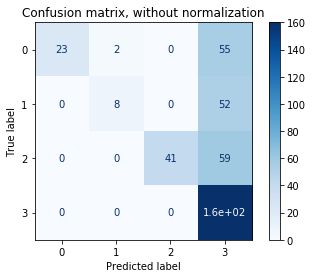

In [143]:
# best parameters of gamma and c are 0.01 and 100
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

gamma = 0.01
C = 100
svm = SVC(gamma=gamma,C=C)
svm.fit(X_trainval, y_trainval)
pred_y_best_train = svm.predict(X_trainval)
f1_score_res_train = f1_score(y_trainval, pred_y_best_train, average=None)

pred_y_best_test = svm.predict(X_test)
f1_score_res_test = f1_score(y_test, pred_y_best_test, average=None)
print("training F1-score:{},testing F1-score:{} for normal and disease tumor respectively".format(f1_score_res_train, f1_score_res_test))

disp = plot_confusion_matrix(svm,X_test,y_test,cmap=plt.cm.Blues,normalize=None)
title = 'Confusion matrix, without normalization'
disp.ax_.set_title('Confusion matrix, without normalization')
print(title)
print(disp.confusion_matrix)
plt.show()

### YOUR TEXT HERE ###

#### some methods and simple explaination about codes ####
- Basically, the process of part 2 is similar with part 1, but labels are increased to 4, which here are represented by 'disease':1, 'normal':0, 'cell line':2, 'neoplasm':3.
- Using class svm to estimate the output label with the input of dataset. Then using f1_score() to do the accuracy estimation related to the input eithor on the training set or on the testing set.
- for specific hyperparameters C and gamma, here using two for-loops to iterate them. Using svm to do label estimation, and then using f1_score to compute accuracy. In the second loop, also computing the best gamma and c for each class, which means four labels.
- Picking up the best hyperparameters of C and gamma to estimate the accuracy on training set and testing set. 
- Using plot_confusion_matrix() to plot figure on testing set.

<a id='result'></a>
<div class=" alert alert-info">

## Results (5 p)

This section presents the results of the experiments. In most problems, the central result is the estimated performance of the final model on new data with respect to the chosen performance metric. In addition, you can for example, present results for different models or consider how the hyperparameters affect the models performance.

</div>

### YOUR TEXT HERE ###
Actually, there are two parts about the results of the experiments, which are part1 with two labels of normal and disease and part2 with four labels of normal, disease, cell_line and neoplasm.

#### part1 result with two labels ####
- the result of part1 is almost of accuracy about 80% eithor in training set or testing set. But all in all, the testing set has a lower accuracy which is regared as a new dataset than the training set. Here the average acuracy on training set is 0.8554, and the average estimation result on testing set is 0.8071. Specifically, the accuracy on training set with method of f1_score is [0.87163233 0.83435583] and [0.82802548 0.7804878 ], in which the sequency of estimation values is in the order of 0-normal and 1-disease.
- the best hyperparameters of C and gamma are 100 and 1e-4 respectively.

#### part2 result with four labels ####
- the result of part2 is much better than part1 on the training set. From the view of f1_score(), the accuracy of training set is almost 100% on four labels. But on the testing set, which is 0.44660194 0.22857143 0.58156028 0.65843621 for labels 2,1,3,0 respectively.
- for different hyperparameters, the hyperparameters would have an huge effect on training set. The best hyperparameter for example gamma:0.01 and C:100 showing better result than bad hyperparameters such as gamma:0.0001 and C:0.01. For the best parameters, the result is nearly 100%, but the result with bad parameter is less than 50% or even 0 on label 0,1,2 on some rounds. So the larger the value of gamma and C are, the better the performance on model is.

#### normal : 0, disease : 1, cell_line : 2, neoplasm : 3 ####
- gamma:0.0001,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
- gamma:0.001,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
- gamma:0.01,C:0.01,accuracy on labels (2,1,3,0) are 0.0000,0.0000,0.0000,0.5714 respectively
- gamma:0.0001,C:1,accuracy on labels (2,1,3,0) are 0.7632,0.7531,0.9816,0.9806 respectively
- gamma:0.001,C:1,accuracy on labels (2,1,3,0) are 0.9013,0.8828,1.0000,1.0000 respectively
- gamma:0.01,C:1,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
- gamma:0.0001,C:100,accuracy on labels (2,1,3,0) are 0.9984,0.9979,1.0000,1.0000 respectively
- gamma:0.001,C:100,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
- gamma:0.01,C:100,accuracy on labels (2,1,3,0) are 1.0000,1.0000,1.0000,1.0000 respectively
- best parameters of gamma and c for class 0 are 0.01 and 100 respectively
- best parameters of gamma and c for class 1 are 0.01 and 100 respectively
- best parameters of gamma and c for class 2 are 0.01 and 100 respectively
- best parameters of gamma and c for class 3 are 0.01 and 100 respectively

Bacially, performance on models without pca is better than models with pca. Performance on LogisticregRegression is quite equally to on SVM

<a id='discussion'></a>
<div class=" alert alert-info">


## Discussion/Conclusions (5 p)

In this section you should analyze the results on a more general level and summarize the findings of your project work. If possible, you should at least answer the following questions:
- Do the results suggest satisfactory performance of your final model, or is there much room for improvement?
- How do your results compare to benchmarks/ solutions of others (if such are available)?
- Are you aware of some methodological shortcomings in the project?
- Do you have ideas for how to improve the performance (e.g. using more training data, using more features for the data points, using different class of predictor functions (hypothesis space) ?

</div>

### YOUR TEXT HERE ###

there are several points that should be noted which are corresponding to the questions above.
1. yes, there is much room to improve my model, because the performance on the testing set behaves really unsatisfied, but the hyperparameters have been reached the best ones. Besides, one point that should be mentioned is that when i used LogisticRegression to fit model and do estimation, the result is better than using Pipeline with StandardScaler(), PCA() and LogisticRegression(). This is the first point i didn't fully understand.
2. I have once read several examples through others' blogs, and someone's results of their problems is similar to mine, especially when using pca to do estimation or results of confusion metrics. I think the result is also really depandent on the dataform itself.
3. Actually, i confronted methological shortcomings from time to time, such as unfamiliar with slicing in dataframe, dividing labels with numbers which could use map() to taking place of manually signing. I don't know whether it is the best method with Pipeline() to train the model with thousands of features since the features are not easily to classify. Compared with machine learning, there is another way using deep learning to train the model, and possibly the accuracy could be higher.
4. i think using more training data is a potential method to increase the accuracy when especially the number of features is more than the number of samples. Besides, algorithm tuning seems a method to modify the hyperparameters in training. Or using several algotithms to matching data, because some algorithms are better suited to a particular type of data sets than others. Hence, it is necessary to apply all relevant models and check the performance.